In [1]:
import pandas as pd
import numpy as np
import json
import os
import imageio
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('training_set_task3.txt') as f:
    train = json.load(f)
with open('dev_set_task3_labeled.txt') as f:
    dev = json.load(f)
with open('test_set_task3.txt') as f:
    test = json.load(f)

In [4]:
labels_indv = []
for i in range(len(train)):
    for j in train[i]['labels']:
        labels_indv.append(j)
        
for i in range(len(dev)):
    for j in dev[i]['labels']:
        labels_indv.append(j)
        
for i in range(len(test)):
    for j in test[i]['labels']:
        labels_indv.append(j)

In [8]:
def countFreq(mylist):
    freq = {}
    for item in mylist:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
            
    for key, value in freq.items():
        print("% s : % d"%(key, value))
    return freq

In [9]:
labels_indv_freq = countFreq(labels_indv)

Black-and-white Fallacy/Dictatorship :  26
Name calling/Labeling :  347
Smears :  602
Reductio ad hitlerum :  23
Transfer :  95
Appeal to fear/prejudice :  91
Loaded Language :  492
Slogans :  70
Causal Oversimplification :  36
Glittering generalities (Virtue) :  112
Flag-waving :  55
Misrepresentation of Someone's Position (Straw Man) :  40
Exaggeration/Minimisation :  99
Repetition :  14
Appeal to (Strong) Emotions :  90
Doubt :  111
Obfuscation, Intentional vagueness, Confusion :  7
Whataboutism :  67
Thought-terminating cliché :  27
Presenting Irrelevant Data (Red Herring) :  7
Appeal to authority :  35
Bandwagon :  5


In [10]:
labels = []
for i in range(len(train)):
    labels.append(train[i]['labels'])
for i in range(len(dev)):
    labels.append(dev[i]['labels'])
for i in range(len(test)):
    labels.append(test[i]['labels'])

In [11]:
len(labels)

950

In [13]:
u = (pd.get_dummies(pd.DataFrame(labels), prefix = '', prefix_sep = '').groupby(level = 0, axis = 1).sum())

In [14]:
v = u.T.dot(u)
v.values[(np.r_[:len(v)], ) * 2] = 0

Text(0.5, 1.0, 'Cooccurance Matrix')

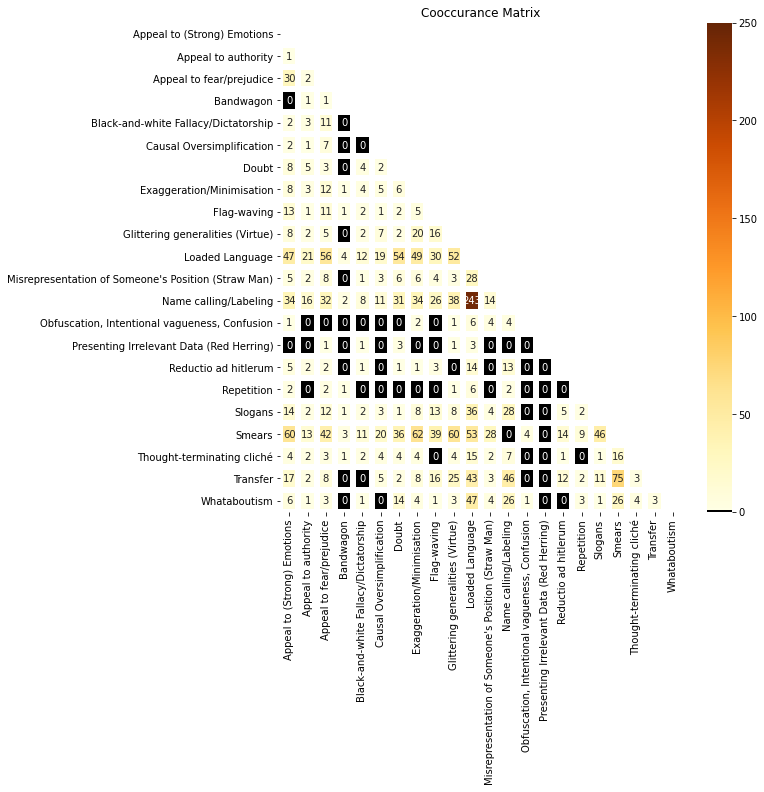

In [15]:
mask = np.zeros_like(v)
mask[np.triu_indices_from(mask)] = True

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


cmap = cm.get_cmap('YlOrBr', 256)
newcolors = cmap(np.linspace(0, 1, 256))
black = np.array([0/256, 0/256, 0/256, 1]) #RGB
newcolors[:1, :] = black
newcmp = ListedColormap(newcolors)


plt.figure(figsize = (9,9))
sns.heatmap(v, linewidth = 5, mask = mask, cmap = newcmp, annot = True, fmt = 'd', vmin = 0, vmax = 250)
plt.title('Cooccurance Matrix')